In [ ]:
import numpy as np
import pandas as pd
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
data_train = pd.read_csv('AAPL.csv')
data_train.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,10.34,10.68,10.32,10.68,201853036,AAPL
1,2006-01-04,10.73,10.85,10.64,10.71,155225609,AAPL
2,2006-01-05,10.69,10.70,10.54,10.63,112396081,AAPL
3,2006-01-06,10.75,10.96,10.65,10.90,176139334,AAPL
4,2006-01-09,10.96,11.03,10.82,10.86,168861224,AAPL


Text(0.5, 1.0, 'Open average')

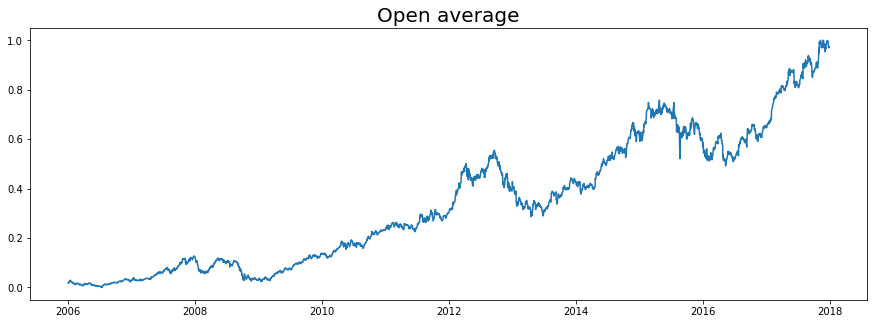

In [15]:
temp = data_train['Open'].astype('float')
dates = pd.to_datetime(data_train['Date'])

temp = (temp - temp.min()) / (temp.max() - temp.min())
temp.values
dates.values

 
plt.figure(figsize=(15,5))
plt.plot(dates, temp)
plt.title('Open average',
          fontsize=20)

In [ ]:
data_train.isnull().sum()
data_train.info()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

In [ ]:
Mae = (data_train['Open'].max() - data_train['Open'].min())*10/100
print(Mae)

16.772000000000002


In [ ]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae')<0.01 and logs.get('val_mae')<0.01):
      print("\mae telah mencapai <10%!")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
from sklearn.model_selection import train_test_split
train_test,validation_test,train_labels,validation_labels=train_test_split(temp,dates,test_size=0.2,random_state=42)

In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [17]:
train_set = windowed_dataset(train_test, window_size=60, batch_size=100, shuffle_buffer=1000)
val_set = windowed_dataset(validation_test, window_size=60, batch_size=120, shuffle_buffer=1200)
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
])

In [18]:
optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set,epochs=10,validation_data=val_set,batch_size=128,callbacks=[callbacks])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
24/24 [==============================] - 65s 168ms/step - loss: 0.1023 - mae: 0.3658 - val_loss: 0.0870 - val_mae: 0.3237
Epoch 2/10
24/24 [==============================] - 3s 120ms/step - loss: 0.0897 - mae: 0.3308 - val_loss: 0.0780 - val_mae: 0.2976
Epoch 3/10
24/24 [==============================] - 3s 122ms/step - loss: 0.0811 - mae: 0.3083 - val_loss: 0.0710 - val_mae: 0.2805
Epoch 4/10
24/24 [==============================] - 3s 119ms/step - loss: 0.0742 - mae: 0.2919 - val_loss: 0.0653 - val_mae: 0.2678
Epoch 5/10
24/24 [==============================] - 3s 130ms/step - loss: 0.0681 - mae: 0.2789 - val_loss: 0.0600 - val_mae: 0.2576
Epoch 6/10
24/24 [==============================] - 4s 137ms/step - loss: 0.0629 - mae: 0.2687 - val_loss: 0.0560 - val_mae: 0.2505
Epoch 7/10
24/24 [==============================] - 3s 124ms/step - loss: 0.0588 - mae: 0.2615 - val_loss: 0.0527 - val_mae: 0.2457
Epoch 8/10
24/24 [==============================] - 3s 121ms/step - loss: 0

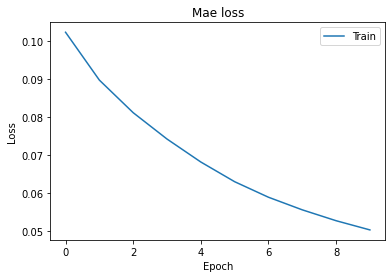

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Mae loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

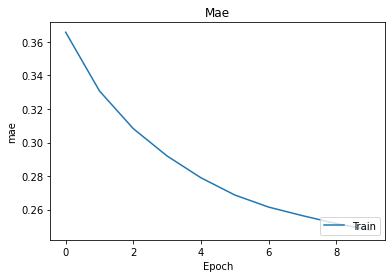

In [21]:
plt.plot(history.history['mae'])
plt.title('Mae')
plt.ylabel('mae')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

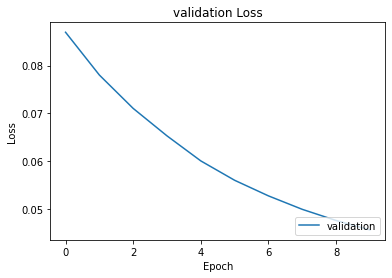

In [22]:
plt.plot(history.history['val_loss'])
plt.title('validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['validation'], loc='lower right')
plt.show()

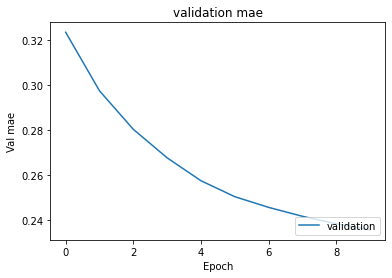

In [23]:
plt.plot(history.history['val_mae'])
plt.title('validation mae')
plt.ylabel('Val mae')
plt.xlabel('Epoch')
plt.legend(['validation'], loc='lower right')
plt.show()

In [24]:
print('Nama                 : Muhammad Amien Ramdhani')
print('Username dicoding    : amienramdhani')
print('email                : dhanimacbull@gmail.com')
print('No telepon           : 085797249521')
print('Kota domisili        : Kabupaten Cirebon')
print('Tempat Tanggal Lahir : Jakarta,08 Desember 2001')
print('Pendidikan terakhir  : Diploma-II di Pesantren Teknologi Informasi dan komunikasi(PeTIK) Depok')
print('Pendidikan Sekarang  : STT Terpadu Nurul Fikri Depok')

Nama                 : Muhammad Amien Ramdhani
Username dicoding    : amienramdhani
email                : dhanimacbull@gmail.com
No telepon           : 085797249521
Kota domisili        : Kabupaten Cirebon
Tempat Tanggal Lahir : Jakarta,08 Desember 2001
Pendidikan terakhir  : Diploma-II di Pesantren Teknologi Informasi dan komunikasi(PeTIK) Depok
Pendidikan Sekarang  : STT Terpadu Nurul Fikri Depok
